【下面路径由于上传到 GitHub。而且课程文件夹含中文，因此最便捷的方法是直接把数据集放到代码相同文件夹内。】
* 【代码】：
    * Pandas —— 一个常见的 Python 数据处理函数库；
    * Pandas —— 【read_csv 函数】，把数据集读入 【DataFrame 数据结构】 —— 命名为 df_housing；
    * 【DataFrame 数据结构】 —— 【head 方法】显示数据集中的部分信息。
* 【数据集】：
    * 加州某时期的房价（各地区整体房价统计信息，1990）；
    * 17 000个样本；
    * 5 个特征，1 个标签；
    * 【目标】：根据已有的数据样本，对其特征进行推理归纳，得到一个函数模型后，就可以用它推断加州其他地区的房价中位数。

In [82]:
import pandas as pd #导入Pandas，用于数据读取和处理
# 读入房价数据，示例代码中的文件地址为internet链接，读者也可以下载该文件到本机进行读取
# 如，当数据集和代码文件位于相同本地目录，路径名应为"./house.csv"，或直接放"house.csv"亦可
df_housing = pd.read_csv(r"house.csv") 
df_housing.head #显示加州房价数据

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  ho

【构建特征数据集 X 和标签数据集 y；习惯上，ML 领域把 X 大写，y 小写。】

In [83]:
X = df_housing.drop("median_house_value",axis = 1) #构建特征集X
y = df_housing.median_house_value #构建标签集y

【数据拆分，二八原则；之后通过比较预测值与（预留的）真值，才知道机器“猜”得准不准，给模型打分（评估阶段）】

In [84]:
from sklearn.model_selection import train_test_split #导入数据集拆分工具
X_train, X_test, y_train, y_test = train_test_split(X, y, 
         test_size=0.2, random_state=0) #以80%/20%的比例进行数据集的拆分

【开始训练数据】
* 选定模型的类型，即选定算法；—— 【Linear Regression 算法模型】
* 【fit 方法】 —— 训练机器的方法，进行函数拟合；
    * —— 意味着找到【最优】的函数去模拟训练集中的输入（特征）和目标（标签）的关系——【确定模型参数】

In [85]:
from sklearn.linear_model import LinearRegression #导入【线性回归算法模型】
model = LinearRegression() #使用线性回归算法
model.fit(X_train, y_train) #用训练集数据，训练机器，拟合函数，确定参数

LinearRegression()

【开始对测试集的房价进行预测】
* 【predict 方法】

In [86]:
y_pred = model.predict(X_test) #预测测试集的Y值
print ('房价的真值(测试集)',y_test)
print ('预测的房价(测试集)',y_pred)

房价的真值(测试集) 3873     171400.0
3625     189600.0
3028     500001.0
13814    229400.0
15398    163400.0
           ...   
1363     212500.0
7947     210500.0
14574    142900.0
10009    128300.0
9149      84700.0
Name: median_house_value, Length: 3400, dtype: float64
预测的房价(测试集) [211157.06335417 218581.64298574 465317.31295563 ... 201751.2396963
 160873.51846959 138847.26913352]


【预测得分】
* 根据 Sklearn 线性回归模型的 score 属性，给出的是 R2 分数，是一个机器学习模型的评估指标 —— 预测值的方差与总体方差之间的差异【统计学知识】。

In [87]:
print("给预测评分：", model.score(X_test, y_test)) #评估预测结果

给预测评分： 0.6321014171579482


【绘图】

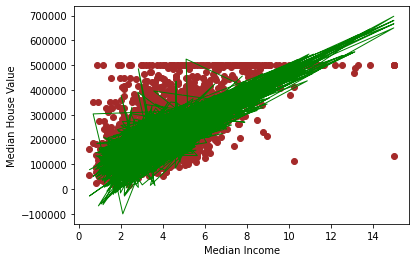

In [88]:
import matplotlib.pyplot as plt #导入matplotlib画图库
#用【散点图】显示家庭收入中位数和房价中位数的分布
plt.scatter(X_test.median_income, y_test,  color='brown')
#画出【回归函数】(从特征到预测标签)
plt.plot(X_test.median_income, y_pred, color='green', linewidth=1)
plt.xlabel('Median Income') #X轴-家庭收入中位数
plt.ylabel('Median House Value') #Y轴-房价中位数
plt.show() #显示【房价分布】和【机器习得的函数图形】

* 【点——得到家庭收入/房价分布】
* 【线——机器学习到的函数模型】

【结论】
* 加州各个地区的平均房价中位数，有随着该地区家庭收入中位数的上升而增加的趋势，而机器学习到的函数也同样体现了这一点（富人区的形成过程）。

（2022/03/28 1:03:47 35min）